##Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt

In [2]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag, FreqDist
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
import re

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Gazal V\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to C:\Users\Gazal
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##Import Dataset

In [3]:
df = pd.read_csv("C:/Users/Gazal V/Desktop/Dowell/all/demo_5.csv")
df

,result_type,id,status,json_endpoint,created_at,processe_at,google_url,raw_html_file,total_time_taken,engine,...,link,serpapi_link,tracking_link,description,displayed_link,thumbnail,favicon,snippet,snippet_highlighted_words,source
0,metadata,64f05e420f986612e4790c25,Success,https://serpapi.com/searches/0fe38a9c64a5b7b7/...,2023-08-31 09:32:50 UTC,NaN,https://www.google.co.in/search?q=instant+food...,https://serpapi.com/searches/0fe38a9c64a5b7b7/...,2.47,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,search_parameters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,google,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,organic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,https://www.amazon.in/Instant-Food/s?k=Instant...,NaN,NaN,NaN,https://www.amazon.in › Instant-Food › k=Insta...,https://serpapi.com/searches/64f05e420f986612e...,https://serpapi.com/searches/64f05e420f986612e...,Amazon.in: Instant Food. ... FREE Delivery ove...,NaN,Amazon.in
3,organic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,https://www.flipkart.com/ready-to-eat/pr?sid=e...,NaN,NaN,NaN,https://www.flipkart.com › ready-to-eat,https://serpapi.com/searches/64f05e420f986612e...,https://serpapi.com/searches/64f05e420f986612e...,Ready To Eat Meals: Buy Ready to Eat Snacks an...,NaN,Flipkart
4,organic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,https://www.bigbasket.com/pc/snacks-branded-fo...,NaN,NaN,NaN,https://www.bigbasket.com › ... › Ready to coo...,https://serpapi.com/searches/64f05e420f986612e...,https://serpapi.com/searches/64f05e420f986612e...,Just order from our ready to eat food online p...,NaN,BigBasket
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,related_searches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,https://www.google.co.in/search?sca_esv=561590...,https://serpapi.com/search.json?device=desktop...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
382,related_searches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,https://www.google.co.in/search?sca_esv=561590...,https://serpapi.com/search.json?device=desktop...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,related_searches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,https://www.google.co.in/search?sca_esv=561590...,https://serpapi.com/search.json?device=desktop...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,related_searches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,https://www.google.co.in/search?sca_esv=561590...,https://serpapi.com/search.json?device=desktop...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.drop(df.iloc[:, :30], inplace=True, axis=1)


In [5]:
df.head()

,snippet,snippet_highlighted_words,source
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,Amazon.in: Instant Food. ... FREE Delivery ove...,NaN,Amazon.in
3,Ready To Eat Meals: Buy Ready to Eat Snacks an...,NaN,Flipkart
4,Just order from our ready to eat food online p...,NaN,BigBasket


In [6]:
df.drop(df.iloc[:, 1:], inplace=True, axis=1)

In [7]:
df= df.dropna()

In [8]:
df.head(4)

,snippet
2,Amazon.in: Instant Food. ... FREE Delivery ove...
3,Ready To Eat Meals: Buy Ready to Eat Snacks an...
4,Just order from our ready to eat food online p...
5,Be the first to know about exciting new flavor...


##Filtering The Dataset

In [9]:
df['new_snippet'] = df['snippet'].apply(lambda x: str(x).title().lower())

C:\Users\Gazal V\AppData\Local\Temp\ipykernel_12284\1150170271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_snippet'] = df['snippet'].apply(lambda x: str(x).title().lower())


In [10]:
df['new_snippet'] = df['new_snippet'].str.replace(r'[^a-zA-Z\s]', ' ') # replacing junk data with space
df[['snippet','new_snippet']].head()

C:\Users\Gazal V\AppData\Local\Temp\ipykernel_12284\3126244276.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['new_snippet'] = df['new_snippet'].str.replace(r'[^a-zA-Z\s]', ' ') # replacing junk data with space
C:\Users\Gazal V\AppData\Local\Temp\ipykernel_12284\3126244276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_snippet'] = df['new_snippet'].str.replace(r'[^a-zA-Z\s]', ' ') # replacing junk data with space


,snippet,new_snippet
2,Amazon.in: Instant Food. ... FREE Delivery ove...,amazon in instant food free delivery ove...
3,Ready To Eat Meals: Buy Ready to Eat Snacks an...,ready to eat meals buy ready to eat snacks an...
4,Just order from our ready to eat food online p...,just order from our ready to eat food online p...
5,Be the first to know about exciting new flavor...,be the first to know about exciting new flavor...
6,"Discover a wide range of ready meals, instant ...",discover a wide range of ready meals instant ...


In [11]:
# Remove single-letter words from each sentence
df['new_snippet'] = df['new_snippet'].apply(lambda sentence: re.sub(r'\b\w\b', '', sentence))

C:\Users\Gazal V\AppData\Local\Temp\ipykernel_12284\799959129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_snippet'] = df['new_snippet'].apply(lambda sentence: re.sub(r'\b\w\b', '', sentence))


In [12]:
# Count words in the 'new_snippet'
df['word_count'] = df['new_snippet'].apply(lambda x: len(x.split()))

C:\Users\Gazal V\AppData\Local\Temp\ipykernel_12284\3739427971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['new_snippet'].apply(lambda x: len(x.split()))


In [13]:
df[['snippet','new_snippet', 'word_count']].head()

,snippet,new_snippet,word_count
2,Amazon.in: Instant Food. ... FREE Delivery ove...,amazon in instant food free delivery ove...,21
3,Ready To Eat Meals: Buy Ready to Eat Snacks an...,ready to eat meals buy ready to eat snacks an...,21
4,Just order from our ready to eat food online p...,just order from our ready to eat food online p...,29
5,Be the first to know about exciting new flavor...,be the first to know about exciting new flavor...,17
6,"Discover a wide range of ready meals, instant ...",discover wide range of ready meals instant m...,24


##Tokenize the words using NLTK Library

In [14]:
tokenized_text = [word_tokenize(text) for text in df['new_snippet']]

In [15]:
pos_text = []

for text in tokenized_text:
    tagged_text = pos_tag(text)
    pos_text.append(tagged_text)

In [16]:
pos_text

[[('amazon', 'NN'),
  ('in', 'IN'),
  ('instant', 'JJ'),
  ('food', 'NN'),
  ('free', 'JJ'),
  ('delivery', 'NN'),
  ('over', 'IN'),
  ('fulfilled', 'VBN'),
  ('by', 'IN'),
  ('amazon', 'NN'),
  ('as', 'RB'),
  ('fast', 'RB'),
  ('as', 'IN'),
  ('hours', 'NNS'),
  ('delivery', 'NN'),
  ('on', 'IN'),
  ('orders', 'NNS'),
  ('above', 'IN'),
  ('of', 'IN'),
  ('fresh', 'JJ'),
  ('items', 'NNS')],
 [('ready', 'JJ'),
  ('to', 'TO'),
  ('eat', 'VB'),
  ('meals', 'NNS'),
  ('buy', 'VBP'),
  ('ready', 'JJ'),
  ('to', 'TO'),
  ('eat', 'VB'),
  ('snacks', 'NNS'),
  ('and', 'CC'),
  ('meals', 'NNS'),
  ('at', 'IN'),
  ('india', 'JJ'),
  ('best', 'JJS'),
  ('online', 'NN'),
  ('shopping', 'NN'),
  ('store', 'NN'),
  ('genuine', 'JJ'),
  ('products', 'NNS'),
  ('best', 'JJS'),
  ('offers', 'NNS')],
 [('just', 'RB'),
  ('order', 'NN'),
  ('from', 'IN'),
  ('our', 'PRP$'),
  ('ready', 'JJ'),
  ('to', 'TO'),
  ('eat', 'VB'),
  ('food', 'NN'),
  ('online', 'JJ'),
  ('page', 'NN'),
  ('at', 'IN'),
  ('b

##Generalizing the tags in respective Part of Speeches

In [17]:
noun_tag = ['NN', 'NNS', 'NNP', 'NNPS']
pronoun_tag = ['PRP', 'PRP$', 'WP', 'WP$']
adjective_tag = ['JJ', 'JJR', 'JJS']
verb_tag = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
adverb_tag = ['RB', 'RBR', 'RBS', 'WRB']
conjunction_tag = ['CC', 'IN']

In [18]:
noun_lists = []

for sublist in pos_text:
    noun_list = [word for word, tag in sublist if tag in noun_tag]
    noun_lists.append(noun_list)

In [19]:
pronoun_lists = []

for sublist in pos_text:
    pronoun_list = [word for word, tag in sublist if tag in pronoun_tag]
    pronoun_lists.append(pronoun_list)

In [20]:
adverb_lists = []

for sublist in pos_text:
    adverb_list = [word for word, tag in sublist if tag in adverb_tag]
    adverb_lists.append(adverb_list)

In [21]:
verb_lists = []

for sublist in pos_text:
    verb_list = [word for word, tag in sublist if tag in verb_tag]
    verb_lists.append(verb_list)

In [22]:
adjective_lists = []

for sublist in pos_text:
    adjective_list = [word for word, tag in sublist if tag in adjective_tag]
    adjective_lists.append(adjective_list)

In [23]:
conjunction_lists = []

for sublist in pos_text:
    conjunction_list = [word for word, tag in sublist if tag in conjunction_tag]
    conjunction_lists.append(conjunction_list)

In [24]:
new_df = df[['new_snippet', 'word_count']]

In [25]:
new_df['noun'] = noun_lists
new_df['pronoun'] = pronoun_lists
new_df['verb'] = verb_lists
new_df['adjective'] = adjective_lists
new_df['adverb'] = adverb_lists
new_df['conjunction'] = conjunction_lists

##Cleaning data by removing duplicates

In [26]:
# Remove duplicates from lists in the column
new_df['noun'] = new_df['noun'].apply(lambda x: list(set(x)))
new_df['pronoun'] = new_df['pronoun'].apply(lambda x: list(set(x)))
new_df['verb'] = new_df['verb'].apply(lambda x: list(set(x)))
new_df['adjective'] = new_df['adjective'].apply(lambda x: list(set(x)))
new_df['adverb'] = new_df['adverb'].apply(lambda x: list(set(x)))
new_df['conjunction'] = new_df['conjunction'].apply(lambda x: list(set(x)))

In [27]:
new_df.style.set_properties( **{'width': '400px'})

,new_snippet,word_count,noun,pronoun,verb,adjective,adverb,conjunction
2,amazon in instant food free delivery over fulfilled by amazon as fast as hours delivery on orders above of fresh items,21,"['amazon', 'orders', 'hours', 'delivery', 'food', 'items']",[],['fulfilled'],"['free', 'fresh', 'instant']","['as', 'fast']","['above', 'as', 'of', 'over', 'on', 'in', 'by']"
3,ready to eat meals buy ready to eat snacks and meals at india best online shopping store genuine products best offers,21,"['snacks', 'online', 'offers', 'meals', 'shopping', 'products', 'store']",[],"['buy', 'eat']","['ready', 'genuine', 'india', 'best']",[],"['and', 'at']"
4,just order from our ready to eat food online page at bigbasket and allow us to cater to your food cravings right from those chatpata snacks to full spread,29,"['snacks', 'chatpata', 'bigbasket', 'order', 'page', 'cravings', 'food', 'spread']","['our', 'your', 'us']","['eat', 'allow', 'cater']","['full', 'ready', 'online']","['right', 'just']","['from', 'and', 'at']"
5,be the first to know about exciting new flavors and offers please enter your email address below,17,"['email', 'address', 'flavors']",['your'],"['know', 'be', 'offers', 'enter', 'exciting']","['first', 'please', 'new']",[],"['below', 'and', 'about']"
6,discover wide range of ready meals instant mixes and gourmet foods at mirchi com enjoy delicious and convenient options for quick meals and snacks,24,"['snacks', 'convenient', 'mixes', 'options', 'foods', 'discover', 'meals', 'com', 'range']",[],"['enjoy', 'gourmet']","['ready', 'quick', 'wide', 'delicious', 'mirchi', 'instant']",[],"['for', 'and', 'of', 'at']"
7,aashirvaad best healthy instant meals ready in minutes with boiling water and includes khatta meetha poha veggie upma suji halwa with jaggery,22,"['suji', 'veggie', 'meetha', 'halwa', 'jaggery', 'minutes', 'meals', 'khatta', 'poha', 'water', 'instant']",[],['includes'],"['healthy', 'boiling', 'upma', 'ready', 'best']",['aashirvaad'],"['with', 'and', 'in']"
8,india largest traditional home made food products global online store since traditional bakshanam spice products instant,16,"['home', 'spice', 'online', 'products', 'food', 'bakshanam', 'store']",[],['made'],"['largest', 'traditional', 'global', 'instant']",['india'],['since']
9,shop ready to eat food products online get your favorite indian meals ready in minute taste delicious foods at the best price order now,24,"['price', 'foods', 'taste', 'order', 'meals', 'products', 'shop', 'food']",['your'],"['eat', 'online', 'get']","['favorite', 'minute', 'indian', 'delicious', 'ready', 'best']",['now'],"['in', 'at']"
10,buy ready to eat food in india at our online branded foods store paytm mall offers ready to eat food instant meals instant food at the best prices,28,"['mall', 'foods', 'india', 'online', 'offers', 'meals', 'food', 'prices']",['our'],"['paytm', 'buy', 'eat', 'branded']","['ready', 'instant', 'best']",['store'],"['in', 'at']"
11,buy ready to eat indian food online at best price choose from wide range of ready to eat foods offered by desimealz order now,24,"['choose', 'price', 'foods', 'online', 'order', 'food', 'range']",[],"['buy', 'eat', 'offered']","['desimealz', 'indian', 'wide', 'ready', 'best']",['now'],"['from', 'of', 'by', 'at']"


In [28]:
dropnan = (new_df["new_snippet"]=='nan')
new_df = new_df[~dropnan]

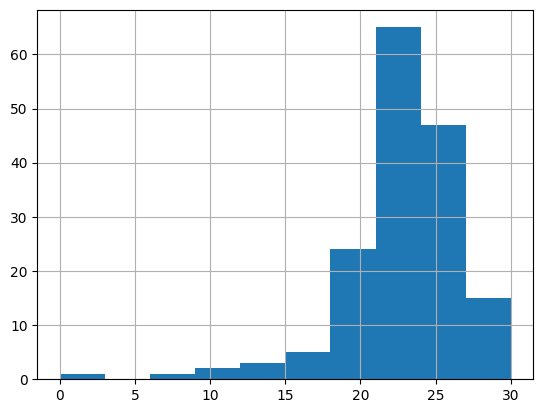

In [29]:
new_df['word_count'] = new_df['new_snippet'].apply(lambda x: len(word_tokenize(x)))
word_count_distribution = new_df['word_count'].hist()

In [30]:
tokens = word_tokenize(' '.join(df['new_snippet']))
fdist = FreqDist(tokens)
most_common_words = fdist.most_common(10)

In [31]:
most_common_words

[('instant', 128),
 ('online', 110),
 ('food', 106),
 ('and', 105),
 ('to', 75),
 ('in', 68),
 ('of', 61),
 ('the', 57),
 ('at', 49),
 ('for', 48)]

In [32]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [33]:
new_df.head()

,new_snippet,word_count,noun,pronoun,verb,adjective,adverb,conjunction
2,amazon in instant food free delivery ove...,21,"[amazon, orders, hours, delivery, food, items]",[],[fulfilled],"[free, fresh, instant]","[as, fast]","[above, as, of, over, on, in, by]"
3,ready to eat meals buy ready to eat snacks an...,21,"[snacks, online, offers, meals, shopping, prod...",[],"[buy, eat]","[ready, genuine, india, best]",[],"[and, at]"
4,just order from our ready to eat food online p...,29,"[snacks, chatpata, bigbasket, order, page, cra...","[our, your, us]","[eat, allow, cater]","[full, ready, online]","[right, just]","[from, and, at]"
5,be the first to know about exciting new flavor...,17,"[email, address, flavors]",[your],"[know, be, offers, enter, exciting]","[first, please, new]",[],"[below, and, about]"
6,discover wide range of ready meals instant m...,24,"[snacks, convenient, mixes, options, foods, di...",[],"[enjoy, gourmet]","[ready, quick, wide, delicious, mirchi, instant]",[],"[for, and, of, at]"


In [34]:
text = " ".join(i for i in new_df.new_snippet)

In [35]:
wordcloud = WordCloud(background_color="white").generate(text)

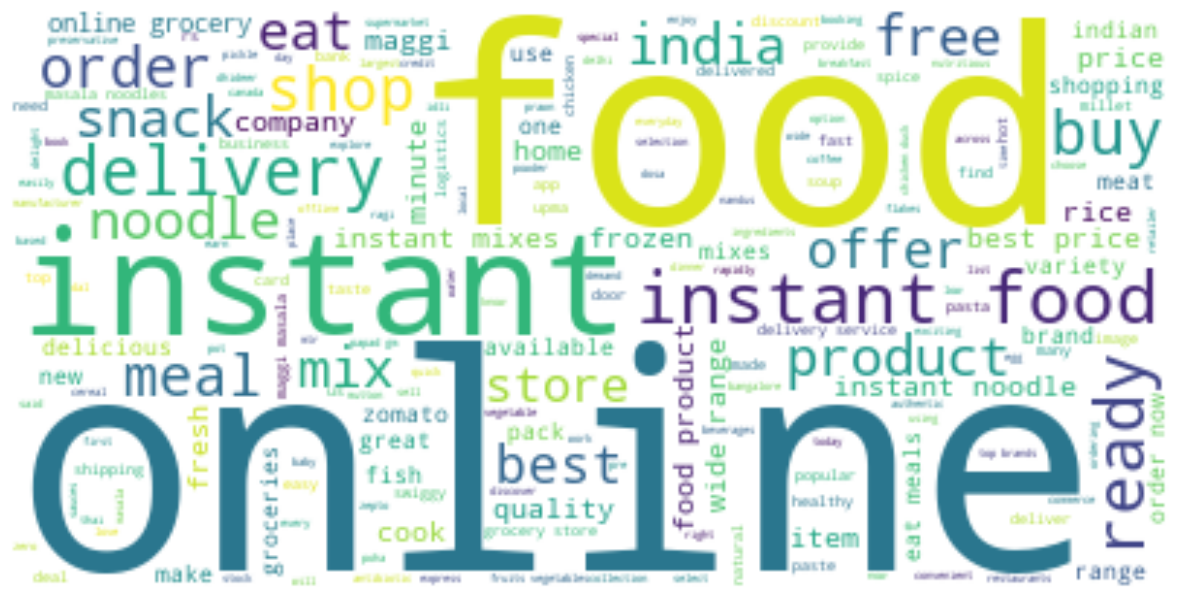

In [36]:
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [37]:
# Noun and Verb Analysis
from nltk import pos_tag
nouns = []
verbs = []
for snippet in df['new_snippet']:
    tagged_words = pos_tag(word_tokenize(snippet))
    for word, pos in tagged_words:
        if pos.startswith('N'):  # Nouns
            nouns.append(word)
        elif pos.startswith('V'):  # Verbs
            verbs.append(word)

In [38]:
nouns

['amazon',
 'food',
 'delivery',
 'amazon',
 'hours',
 'delivery',
 'orders',
 'items',
 'meals',
 'snacks',
 'meals',
 'online',
 'shopping',
 'store',
 'products',
 'offers',
 'order',
 'food',
 'page',
 'bigbasket',
 'food',
 'cravings',
 'chatpata',
 'snacks',
 'spread',
 'flavors',
 'email',
 'address',
 'discover',
 'range',
 'meals',
 'mixes',
 'foods',
 'com',
 'convenient',
 'options',
 'meals',
 'snacks',
 'instant',
 'meals',
 'minutes',
 'water',
 'khatta',
 'meetha',
 'poha',
 'veggie',
 'suji',
 'halwa',
 'jaggery',
 'home',
 'food',
 'products',
 'online',
 'store',
 'bakshanam',
 'spice',
 'products',
 'shop',
 'food',
 'products',
 'meals',
 'taste',
 'foods',
 'price',
 'order',
 'food',
 'india',
 'online',
 'foods',
 'mall',
 'offers',
 'food',
 'meals',
 'food',
 'prices',
 'food',
 'online',
 'price',
 'choose',
 'range',
 'foods',
 'order',
 'taste',
 'company',
 'ttc',
 'food',
 'brand',
 'home',
 'style',
 'recipes',
 'notch',
 'words',
 'variety',
 'snacks',
 

In [39]:
verbs

['fulfilled',
 'eat',
 'buy',
 'eat',
 'eat',
 'allow',
 'cater',
 'be',
 'know',
 'exciting',
 'offers',
 'enter',
 'gourmet',
 'enjoy',
 'includes',
 'made',
 'eat',
 'online',
 'get',
 'buy',
 'eat',
 'branded',
 'paytm',
 'eat',
 'buy',
 'eat',
 'eat',
 'offered',
 'call',
 'is',
 'is',
 'cooked',
 'taken',
 'prepare',
 'find',
 'eat',
 'online',
 'offer',
 'online',
 'buy',
 'leading',
 'deliver',
 'online',
 'crunch',
 'etc',
 'buy',
 'online',
 'kheer',
 'veg',
 'rs',
 'knorr',
 'masala',
 'buy',
 'online',
 'get',
 'delivered',
 'assured',
 'enjoy',
 'buy',
 'cook',
 'cook',
 'mtr',
 'pasta',
 'cook',
 'buy',
 'cook',
 'shipping',
 'vary',
 'based',
 'online',
 'include',
 'kichadi',
 'almond',
 'misal',
 'curry',
 'multigrain',
 'delight',
 'online',
 'online',
 'buy',
 'packaged',
 'is',
 'cheapest',
 'get',
 'is',
 'shopping',
 'provide',
 'grow',
 'grow',
 'opposite',
 'eat',
 'cook',
 'online',
 'masala',
 'colouring',
 'buy',
 'eat',
 'vermicelli',
 'eat',
 'instant',
 'b

In [42]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [44]:
# imports and load spacy english language package
import spacy
from spacy import displacy
from spacy import tokenizer
nlp = spacy.load('en_core_web_sm')

In [45]:
#Load the text and process it
# I copied the text from snippet reviews
text1 =("amazon in instant food free delivery over fulfilled by amazon as fast as hours delivery on orders above of fresh items"
       "ready to eat meals buy ready to eat snacks and meals at india best online shopping store genuine products best offers"
       "just order from our ready to eat food online page at bigbasket and allow us to cater to your food cravings right from those chatpata snacks to full spread"
       "be the first to know about exciting new flavors and offers please enter your email address below"
       "discover wide range of ready meals instant mixes and gourmet foods at mirchi com enjoy delicious and convenient options for quick meals and snacks"
       "aashirvaad best healthy instant meals ready in minutes with boiling water and includes khatta meetha poha veggie upma suji halwa with jaggery")

In [46]:
# text2 = # copy the paragraphs from  https://www.python.org/doc/essays/
doc = nlp(text1)

sentences = list(doc.sents)
print(sentences)

for token in doc:
    print(token.text)

ents = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents]
print(ents)
# now we use displaycy function on doc2
displacy.render(doc, style='ent', jupyter=True)

[amazon in instant food free delivery over fulfilled by amazon as fast as hours delivery on orders above of fresh itemsready to eat meals buy ready to eat snacks and meals at india best online shopping store genuine products best offersjust order from our ready to eat food online page at bigbasket and allow us to cater to your food cravings right from those chatpata snacks to full spreadbe the first to know about exciting new flavors and offers please enter your email address belowdiscover wide range of ready meals instant mixes and gourmet foods at mirchi com enjoy delicious and convenient options for quick meals and snacksaashirvaad best healthy instant meals ready in minutes with boiling water and includes khatta meetha poha veggie upma suji halwa with jaggery]
amazon
in
instant
food
free
delivery
over
fulfilled
by
amazon
as
fast
as
hours
delivery
on
orders
above
of
fresh
itemsready
to
eat
meals
buy
ready
to
eat
snacks
and
meals
at
india
best
online
shopping
store
genuine
products
b

In [54]:
# trying snippet column
text = " ".join(i for i in new_df.new_snippet)

In [55]:
doc = nlp(text)

sentences = list(doc.sents)
print(sentences)

for token in doc:
    print(token.text)
# print entities
ents = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents]
print(ents)
# now we use displaycy function on doc2
displacy.render(doc, style='ent', jupyter=True)

[amazon in  instant food      free delivery over       fulfilled by amazon      as fast as   hours delivery on orders above       of fresh items  ready to eat meals  buy ready to eat snacks and meals at india  best online shopping store   genuine products  best offers  just order from our ready to eat food online page at bigbasket and allow us to cater to your food cravings  right from those chatpata snacks to full spread     be the first to know about exciting new flavors and offers  please enter your email address below  discover  wide range of ready meals  instant mixes  and gourmet foods at mirchi com  enjoy delicious and convenient options for quick meals and snacks  aashirvaad best healthy instant meals ready in minutes with boiling water and includes khatta meetha poha  veggie upma  suji halwa with jaggery      india  largest traditional home made food products global online store since       traditional bakshanam  spice products  instant     shop ready to eat food products onli